Dataset Preview:
   Row ID Order Priority  Discount offered  Unit Price  Freight Expenses  \
0      64         Medium              0.08      124.49             51.94   
1      66           High              0.02        3.69              0.50   
2      67           High              0.09        3.85              0.70   
3     188           High              0.08        5.28              5.57   
4     224           High              0.07       65.99              8.99   

   Customer No Name of customer    Freight Mode             Segment  \
0          553           Skidoo  Delivery Truck  Hotels / Hospitals   
1         3289          Dabtype     Regular Air  Hotels / Hospitals   
2         3289          Dabtype     Regular Air  Hotels / Hospitals   
3         2491         Blogtags     Regular Air    Restaurant Chain   
4          308       Brightbean     Regular Air      Personel Usage   

     Product Type  ...       City Region  Country Order Date  Ship Date  \
0  Preserved Food  ...  

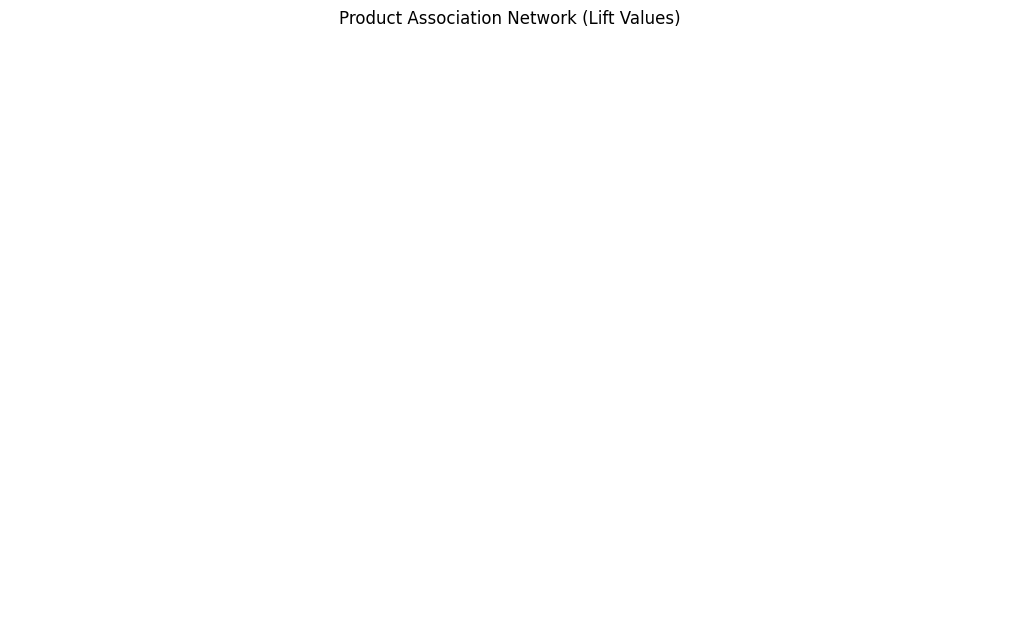

<Figure size 1200x600 with 0 Axes>

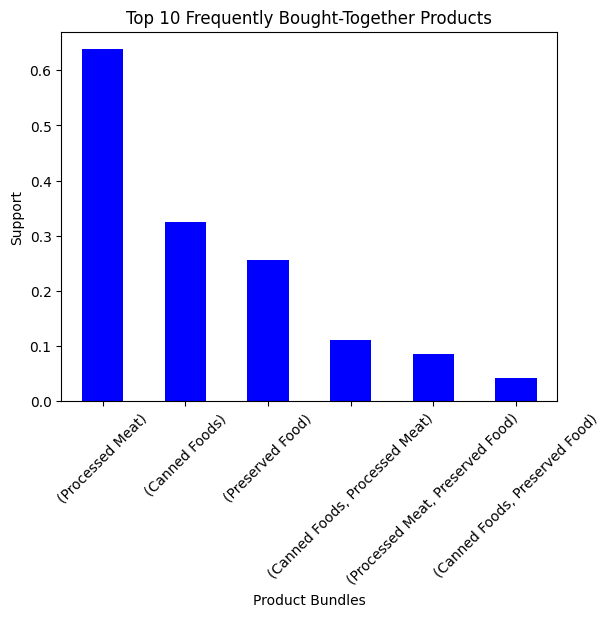

In [1]:
# Install necessary libraries (if not already installed)
!pip install mlxtend networkx matplotlib pandas numpy

# Import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "/content/retail_India.xlsx"  # Upload the file to Colab first
xls = pd.ExcelFile(file_path)

# Load the 'rawdata' sheet
df = pd.read_excel(xls, 'rawdata')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Extract necessary columns
df = df[['Order ID', 'Product Type']]

# Remove duplicate entries within the same order
df = df.drop_duplicates()

# Convert data into transaction format (Order ID as index, Products as columns)
basket = df.pivot_table(index='Order ID', columns='Product Type', aggfunc=lambda x: 1, fill_value=0)

# Convert to boolean format
basket = basket.astype(bool)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display top 10 rules based on confidence
print("\nTop 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False).head(10))

# Convert frozensets to lists for visualization
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0] if len(x) == 1 else list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0] if len(x) == 1 else list(x))

# Visualize the strongest associations using a Network Graph
plt.figure(figsize=(10, 6))
G = nx.DiGraph()

for i, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

plt.title("Product Association Network (Lift Values)")
plt.show()

# Visualizing frequent itemsets
plt.figure(figsize=(12,6))
frequent_itemsets.sort_values(by="support", ascending=False).head(10).plot(
    x="itemsets", y="support", kind="bar", legend=False, color="blue"
)
plt.xlabel("Product Bundles")
plt.ylabel("Support")
plt.title("Top 10 Frequently Bought-Together Products")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Preview:
   Row ID Order Priority  Discount offered  Unit Price  Freight Expenses  \
0      64         Medium              0.08      124.49             51.94   
1      66           High              0.02        3.69              0.50   
2      67           High              0.09        3.85              0.70   
3     188           High              0.08        5.28              5.57   
4     224           High              0.07       65.99              8.99   

   Customer No Name of customer    Freight Mode             Segment  \
0          553           Skidoo  Delivery Truck  Hotels / Hospitals   
1         3289          Dabtype     Regular Air  Hotels / Hospitals   
2         3289          Dabtype     Regular Air  Hotels / Hospitals   
3         2491         Blogtags     Regular Air    Restaurant Chain   
4          308       Brightbean     Regular Air      Personel Usage   

     Product Type  ...       City Region  Country Order Date  Ship Date  \
0  Preserved Food  ...  

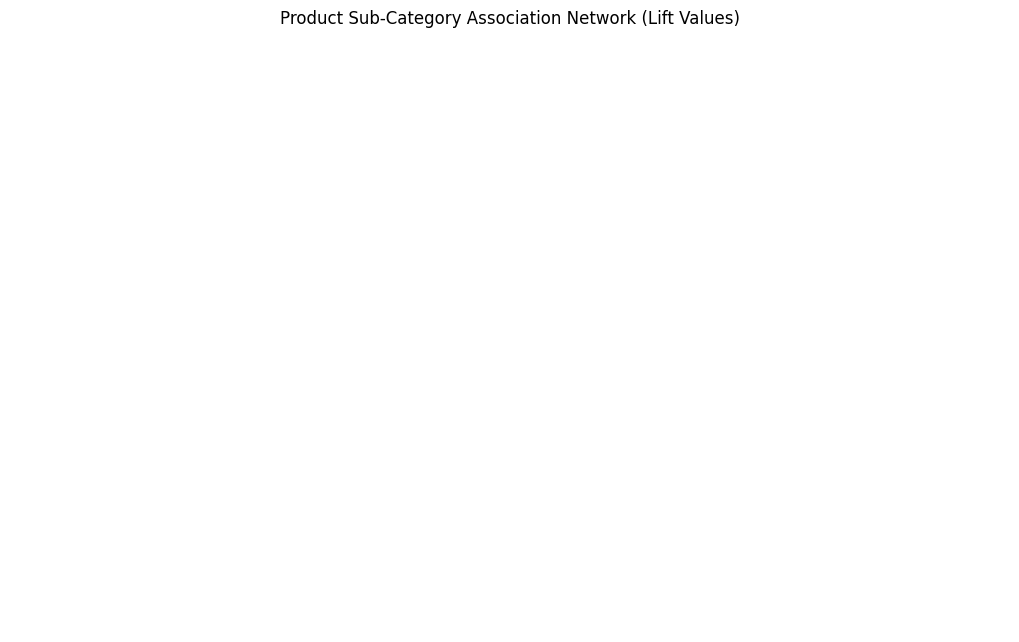

<Figure size 1200x600 with 0 Axes>

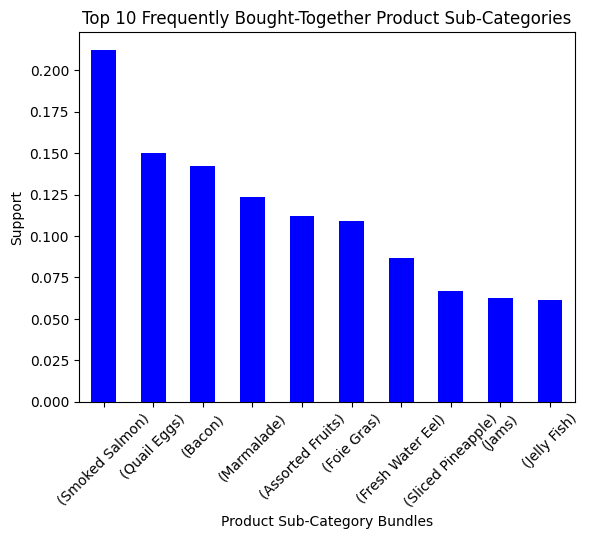

In [2]:
# Install necessary libraries (if not already installed)
!pip install mlxtend networkx matplotlib pandas numpy

# Import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "/content/retail_India.xlsx"  # Upload the file to Colab first
xls = pd.ExcelFile(file_path)

# Load the 'rawdata' sheet
df = pd.read_excel(xls, 'rawdata')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Extract necessary columns
df = df[['Order ID', 'Product Sub-Category']]

# Remove duplicate entries within the same order
df = df.drop_duplicates()

# Convert data into transaction format (Order ID as index, Product Sub-Categories as columns)
basket = df.pivot_table(index='Order ID', columns='Product Sub-Category', aggfunc=lambda x: 1, fill_value=0)

# Convert to boolean format
basket = basket.astype(bool)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display top 10 rules based on confidence
print("\nTop 10 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False).head(10))

# Convert frozensets to lists for visualization
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0] if len(x) == 1 else list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0] if len(x) == 1 else list(x))

# Visualize the strongest associations using a Network Graph
plt.figure(figsize=(10, 6))
G = nx.DiGraph()

for i, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

plt.title("Product Sub-Category Association Network (Lift Values)")
plt.show()

# Visualizing frequent itemsets
plt.figure(figsize=(12,6))
frequent_itemsets.sort_values(by="support", ascending=False).head(10).plot(
    x="itemsets", y="support", kind="bar", legend=False, color="blue"
)
plt.xlabel("Product Sub-Category Bundles")
plt.ylabel("Support")
plt.title("Top 10 Frequently Bought-Together Product Sub-Categories")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Preview:
   Row ID Order Priority  Discount offered  Unit Price  Freight Expenses  \
0      64         Medium              0.08      124.49             51.94   
1      66           High              0.02        3.69              0.50   
2      67           High              0.09        3.85              0.70   
3     188           High              0.08        5.28              5.57   
4     224           High              0.07       65.99              8.99   

   Customer No Name of customer    Freight Mode             Segment  \
0          553           Skidoo  Delivery Truck  Hotels / Hospitals   
1         3289          Dabtype     Regular Air  Hotels / Hospitals   
2         3289          Dabtype     Regular Air  Hotels / Hospitals   
3         2491         Blogtags     Regular Air    Restaurant Chain   
4          308       Brightbean     Regular Air      Personel Usage   

     Product Type  ...       City Region  Country Order Date  Ship Date  \
0  Preserved Food  ...  

IndexError: index 0 is out of bounds for axis 0 with size 0

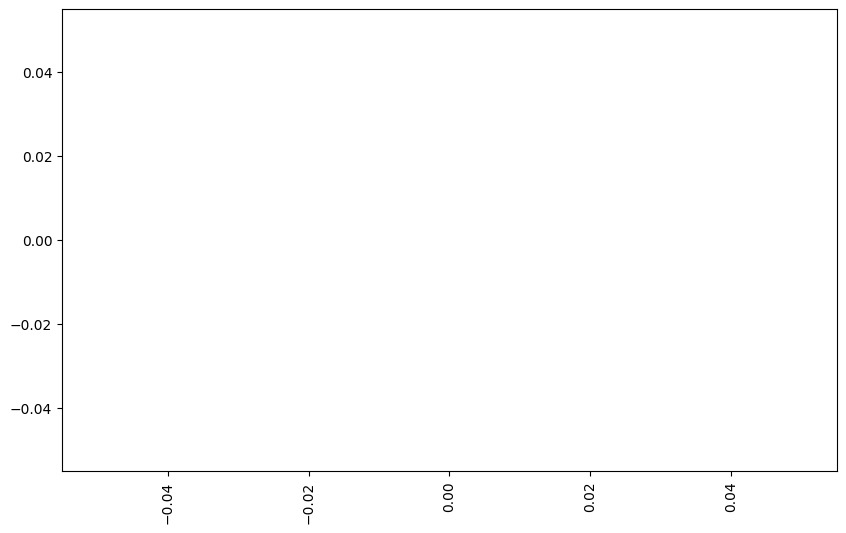

In [3]:
# Install necessary libraries (if not already installed)
!pip install mlxtend networkx matplotlib pandas numpy

# Import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "/content/retail_India.xlsx"  # Upload the file to Colab first
xls = pd.ExcelFile(file_path)

# Load the 'rawdata' sheet
df = pd.read_excel(xls, 'rawdata')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Extract necessary columns
df = df[['Order ID', 'Product Sub-Category', 'Segment']]

# Remove duplicate entries within the same order
df = df.drop_duplicates()

# Convert data into transaction format (Order ID as index, Product Sub-Categories as columns)
basket = df.pivot_table(index='Order ID', columns='Product Sub-Category', aggfunc=lambda x: 1, fill_value=0)

# Convert to boolean format
basket = basket.astype(bool)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display top 10 rules based on confidence
print("\nTop 10 Association Rules for Bundling:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False).head(10))

# Convert frozensets to lists for visualization
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))

# Identify the top audience segments for these bundles
top_product_bundles = rules.sort_values(by='confidence', ascending=False).head(10)
merged_df = df.merge(top_product_bundles, left_on='Product Sub-Category', right_on='antecedents', how='inner')

# Count occurrences of segments in top bundles
segment_counts = merged_df['Segment'].value_counts().head(5)

# Plot audience targeting insights
plt.figure(figsize=(10,6))
segment_counts.plot(kind='bar', color='orange')
plt.xlabel("Customer Segment")
plt.ylabel("Number of Transactions")
plt.title("Top Customer Segments for Product Bundles")
plt.xticks(rotation=45)
plt.show()

# Visualize the strongest associations using a Network Graph
plt.figure(figsize=(12, 7))
G = nx.DiGraph()

for i, row in top_product_bundles.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=4000, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

plt.title("Product Bundle Associations (Lift Values)")
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Preview:
   Row ID Order Priority  Discount offered  Unit Price  Freight Expenses  \
0      64         Medium              0.08      124.49             51.94   
1      66           High              0.02        3.69              0.50   
2      67           High              0.09        3.85              0.70   
3     188           High              0.08        5.28              5.57   
4     224           High              0.07       65.99              8.99   

   Customer No Name of customer    Freight Mode             Segment  \
0          553           Skidoo  Delivery Truck  Hotels / Hospitals   
1         3289          Dabtype     Regular Air  Hotels / Hospitals   
2         3289          Dabtype     Regular Air  Hotels / Hospitals   
3         2491         Blogtags     Regular Air    Restaurant Chain   
4          308       Brightbean     Regular Air      Personel Usage   

     Product Type  ...       City Region  Country Order Date  Ship Date  \
0  Preserved Food  ...  

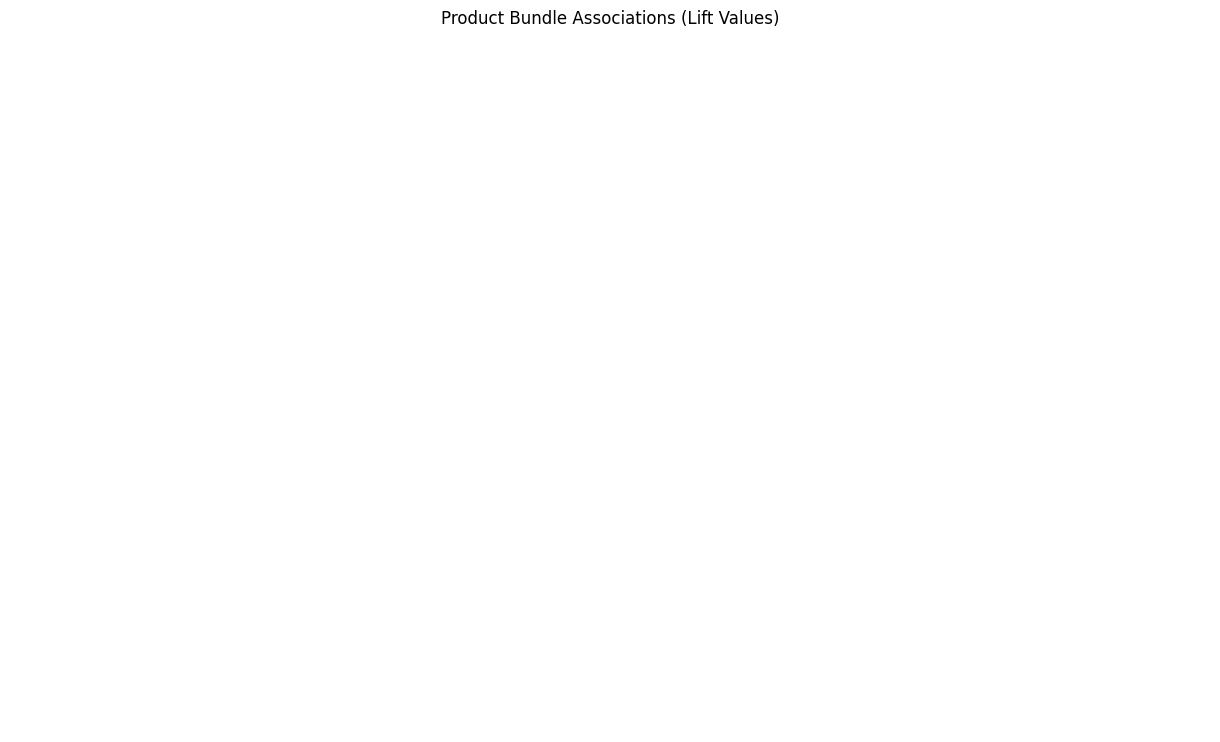

In [4]:
# Install necessary libraries (if not already installed)
!pip install mlxtend networkx matplotlib pandas numpy

# Import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "/content/retail_India.xlsx"  # Upload the file to Colab first
xls = pd.ExcelFile(file_path)

# Load the 'rawdata' sheet
df = pd.read_excel(xls, 'rawdata')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Extract necessary columns
df = df[['Order ID', 'Product Sub-Category', 'Segment']]

# Remove duplicate entries within the same order
df = df.drop_duplicates()

# Convert data into transaction format (Order ID as index, Product Sub-Categories as columns)
basket = df.pivot_table(index='Order ID', columns='Product Sub-Category', aggfunc=lambda x: 1, fill_value=0)

# Convert to boolean format
basket = basket.astype(bool)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display top 10 rules based on confidence
print("\nTop 10 Association Rules for Bundling:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False).head(10))

# Convert frozensets to lists for visualization
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))

# Identify the top audience segments for these bundles
top_product_bundles = rules.sort_values(by='confidence', ascending=False).head(10)

# Flatten the antecedents and consequents for merging
top_products = set(item for sublist in top_product_bundles['antecedents'] for item in sublist) | \
               set(item for sublist in top_product_bundles['consequents'] for item in sublist)

# Filter the dataset for relevant products
filtered_df = df[df['Product Sub-Category'].isin(top_products)]

# Count occurrences of segments in top bundles
segment_counts = filtered_df['Segment'].value_counts()

# Plot audience targeting insights only if there are valid segments
if not segment_counts.empty:
    plt.figure(figsize=(10,6))
    segment_counts.plot(kind='bar', color='orange')
    plt.xlabel("Customer Segment")
    plt.ylabel("Number of Transactions")
    plt.title("Top Customer Segments for Product Bundles")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No matching customer segments found for top product bundles.")

# Visualize the strongest associations using a Network Graph
plt.figure(figsize=(12, 7))
G = nx.DiGraph()

for i, row in top_product_bundles.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=4000, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

plt.title("Product Bundle Associations (Lift Values)")
plt.show()


In [5]:
# Install necessary libraries (if not already installed)
!pip install mlxtend networkx matplotlib pandas numpy

# Import required libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = "/content/retail_India.xlsx"  # Upload the file to Colab first
xls = pd.ExcelFile(file_path)

# Load the 'rawdata' sheet
df = pd.read_excel(xls, 'rawdata')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Extract necessary columns
df = df[['Order ID', 'Product Sub-Category', 'Segment']]

# Remove duplicate entries within the same order
df = df.drop_duplicates()

# Convert data into transaction format (Order ID as index, Product Sub-Categories as columns)
basket = df.pivot_table(index='Order ID', columns='Product Sub-Category', aggfunc=lambda x: 1, fill_value=0)

# Convert to boolean format
basket = basket.astype(bool)

# Apply Apriori algorithm with a lower support threshold
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules with a minimum lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Check if rules are found
if rules.empty:
    print("No strong product associations found. Try lowering the support threshold.")
else:
    # Display top 10 rules based on confidence
    print("\nTop 10 Association Rules for Bundling:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False).head(10))

    # Convert frozensets to lists for visualization
    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    # Identify the top audience segments for these bundles
    top_product_bundles = rules.sort_values(by='confidence', ascending=False).head(10)

    # Flatten the antecedents and consequents for merging
    top_products = set(item for sublist in rules['antecedents'] for item in sublist.split(', ')) | \
                   set(item for sublist in rules['consequents'] for item in sublist.split(', '))

    # Filter the dataset for relevant products
    filtered_df = df[df['Product Sub-Category'].isin(top_products)]

    # Count occurrences of segments in top bundles
    segment_counts = filtered_df['Segment'].value_counts()

    # Plot audience targeting insights only if there are valid segments
    if not segment_counts.empty:
        plt.figure(figsize=(10,6))
        segment_counts.plot(kind='bar', color='orange')
        plt.xlabel("Customer Segment")
        plt.ylabel("Number of Transactions")
        plt.title("Top Customer Segments for Product Bundles")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("No matching customer segments found for top product bundles.")

    # Visualize the strongest associations using a Network Graph
    plt.figure(figsize=(12, 7))
    G = nx.DiGraph()

    for i, row in top_product_bundles.iterrows():
        G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

    pos = nx.spring_layout(G, k=0.5)
    edges = G.edges(data=True)

    nx.draw(G, pos, with_labels=True, node_size=4000, node_color="lightblue", font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges})

    plt.title("Product Bundle Associations (Lift Values)")
    plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Preview:
   Row ID Order Priority  Discount offered  Unit Price  Freight Expenses  \
0      64         Medium              0.08      124.49             51.94   
1      66           High              0.02        3.69              0.50   
2      67           High              0.09        3.85              0.70   
3     188           High              0.08        5.28              5.57   
4     224           High              0.07       65.99              8.99   

   Customer No Name of customer    Freight Mode             Segment  \
0          553           Skidoo  Delivery Truck  Hotels / Hospitals   
1         3289          Dabtype     Regular Air  Hotels / Hospitals   
2         3289          Dabtype     Regular Air  Hotels / Hospitals   
3         2491         Blogtags     Regular Air    Restaurant Chain   
4          308       Brightbean     Regular Air      Personel Usage   

     Product Type  ...       City Region  Country Order Date  Ship Date  \
0  Preserved Food  ...  